In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%precision 3
%matplotlib inline

In [3]:
x_set = np.array([1,2,3,4,5,6])

In [4]:
def f(x):
    if x in x_set: # x_set は 1～6 の確率変数
        return x/21
    else:
        return 0

In [5]:
for _ in range(3):
    x = np.random.choice(x_set)
    print(f'{_+1}回目の確率：', f(x))

1回目の確率： 0.2857142857142857
2回目の確率： 0.047619047619047616
3回目の確率： 0.2857142857142857


In [6]:
X = [x_set, f]
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [7]:
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set,prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

Text(0, 0.5, 'probability')

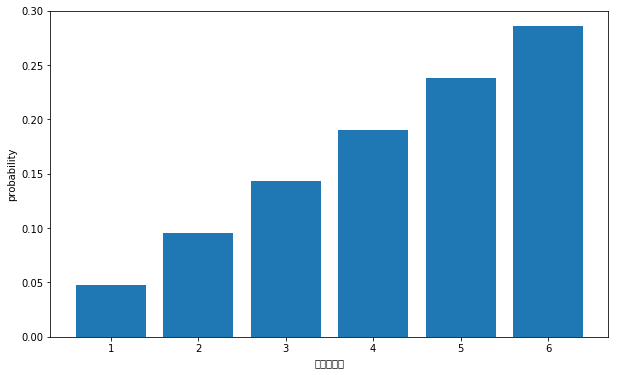

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('取りうる値')
ax.set_ylabel('probability')

In [9]:
np.all(prob >= 0)

True

In [10]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [11]:
F(3)

0.2857142857142857

In [12]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [13]:
np.sum(prob)

0.9999999999999999

In [15]:
np.sum([x_k * f(x_k) for x_k in x_set]) #期待値

4.333333333333333

In [16]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.330124

In [20]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [21]:
E(X)

4.333333333333333

In [23]:
E(X, g=lambda x: 2*x + 3)

11.666666666666664

あああ

In [24]:
2 * E(X) + 3

11.666666666666666

In [25]:
mean = E(X)
np.sum([x_k - mean ** 2 * f(x_k) for x_k in x_set])

2.2222222222222268

In [26]:
def V (X, g=lambda x : x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [27]:
V(X)

2.2222222222222223

In [28]:
V(X, lambda x: 2*x + 3)

8.88888888888889

In [29]:
2 ** 2 * V(X)

8.88888888888889

In [30]:
# X と Y のとり得る値
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [32]:
#同時確立関数を定義
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [33]:
XY = [x_set, y_set, f_XY]

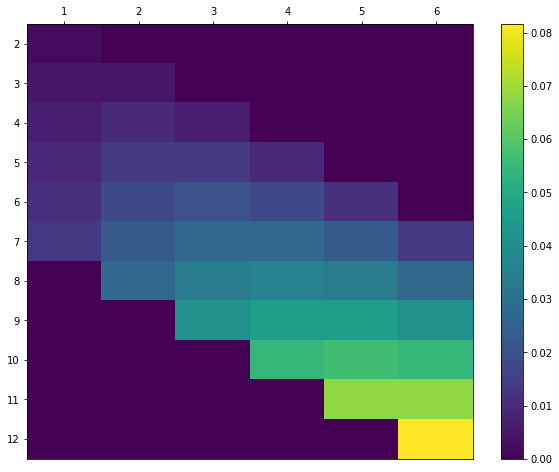

In [37]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                for x_i in x_set])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [38]:
np.all(prob >= 0)

True

In [39]:
np.sum(prob)

1.0

In [40]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [41]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [42]:
X = [x_set, f_X]
Y = [y_set, f_Y]

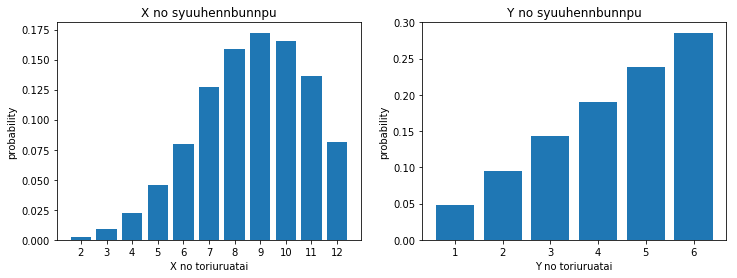

In [44]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X no syuuhennbunnpu')
ax1.set_xlabel('X no toriuruatai')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y no syuuhennbunnpu')
ax2.set_xlabel('Y no toriuruatai')
ax2.set_ylabel('probability')

plt.show()

In [45]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [46]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [48]:
mean_X = E(XY, lambda x, y:x)
mean_X

8.666666666666666

In [49]:
meanY = E(XY, lambda x, y:y)
meanY

4.333333333333333

In [50]:
np.sum([(x_i - mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [51]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [54]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

In [55]:
var_Y = V(XY, g=lambda x, y:y)
var_Y

2.2222222222222223

In [59]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y:x)
    mean_Y = E(XY, lambda x, y:y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

In [60]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [62]:
a, b = 2, 3
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [63]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

In [64]:
#相関係数
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474